In [1]:
import mne
import os.path as op
import numpy as np

In [2]:
fs_dir = "/Users/martin/mne_data/MNE-fsaverage-data/"
subject_dir = op.dirname(fs_dir)

subject = 'fsaverage'
trans = 'fsaverage'

model = mne.make_bem_model(subject=subject, ico=4, conductivity=(0.3, 0.006, 0.3), subjects_dir=subject_dir)
bem = mne.make_bem_solution(model)

Creating the BEM geometry...
Going from 5th to 4th subdivision of an icosahedron (n_tri: 20480 -> 5120)
Going from 5th to 4th subdivision of an icosahedron (n_tri: 20480 -> 5120)
Going from 5th to 4th subdivision of an icosahedron (n_tri: 20480 -> 5120)
outer skin  CM is  -0.21 -19.38  -0.23 mm
outer skull CM is  -0.19 -19.34  -0.49 mm
inner skull CM is  -0.53 -21.10   6.21 mm
Checking that surface outer skull is inside surface outer skin  ...
Checking that surface inner skull is inside surface outer skull ...
Checking distance between outer skin  and outer skull surfaces...
Minimum distance between the outer skin  and outer skull surfaces is approximately    1.6 mm
Checking distance between outer skull and inner skull surfaces...
Minimum distance between the outer skull and inner skull surfaces is approximately    5.4 mm
Surfaces passed the basic topology checks.
Complete.

Approximation method : Linear collocation

Three-layer model surfaces loaded.
Computing the linear collocation s

In [4]:
src = mne.setup_volume_source_space(subject=subject, bem=bem, subjects_dir=subject_dir, add_interpolator=False)

BEM              : <ConductorModel | BEM (3 layers)>
grid                  : 5.0 mm
mindist               : 5.0 mm
MRI volume            : /Users/martin/mne_data/MNE-fsaverage-data/fsaverage/mri/T1.mgz

Reading /Users/martin/mne_data/MNE-fsaverage-data/fsaverage/mri/T1.mgz...

Taking inner skull from <ConductorModel | BEM (3 layers)>
Surface CM = (  -0.5  -21.1    6.2) mm
Surface fits inside a sphere with radius   98.3 mm
Surface extent:
    x =  -75.2 ...   76.3 mm
    y = -113.3 ...   75.0 mm
    z =  -71.7 ...   88.2 mm
Grid extent:
    x =  -80.0 ...   80.0 mm
    y = -115.0 ...   75.0 mm
    z =  -75.0 ...   90.0 mm
43758 sources before omitting any.
29824 sources after omitting infeasible sources not within 0.0 - 98.3 mm.
Source spaces are in MRI coordinates.
Checking that the sources are inside the surface and at least    5.0 mm away (will take a few...)
Checking surface interior status for 29824 points...
    Found  3653/29824 points inside  an interior sphere of radius   47.7 

In [5]:
kind = "standard_1020"
montage = mne.channels.make_standard_montage(kind, head_size='auto')
info = mne.create_info(ch_names=montage.ch_names, sfreq=256, ch_types='eeg')
info.set_montage(montage)


forward_solution = mne.make_forward_solution(info, trans=trans, src=src, bem=bem,
                                meg=False, eeg=True, mindist=0.0)

Source space          : <SourceSpaces: [<volume, shape=(33, 39, 34), n_used=14629>] MRI (surface RAS) coords, subject 'fsaverage', ~10.8 MB>
MRI -> head transform : /Users/martin/anaconda3/envs/mne/lib/python3.10/site-packages/mne/data/fsaverage/fsaverage-trans.fif
Measurement data      : instance of Info
Conductor model   : instance of ConductorModel
Accurate field computations
Do computations in head coordinates
Free source orientations

Read 1 source spaces a total of 14629 active source locations

Coordinate transformation: MRI (surface RAS) -> head
     0.999994  0.003552  0.000202      -1.76 mm
    -0.003558  0.998389  0.056626      31.09 mm
    -0.000001 -0.056626  0.998395      39.60 mm
     0.000000  0.000000  0.000000       1.00

Read  94 EEG channels from info
Head coordinate coil definitions created.
Source spaces are now in head coordinates.

Employing the head->MRI coordinate transform with the BEM model.
BEM model instance of ConductorModel is now set up

Source spaces a

Using surface: /Users/martin/mne_data/MNE-fsaverage-data/fsaverage/bem/inner_skull.surf
Using surface: /Users/martin/mne_data/MNE-fsaverage-data/fsaverage/bem/outer_skull.surf
Using surface: /Users/martin/mne_data/MNE-fsaverage-data/fsaverage/bem/outer_skin.surf


/Users/martin/anaconda3/envs/mne/lib/python3.10/site-packages/mne/viz/utils.py:120: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


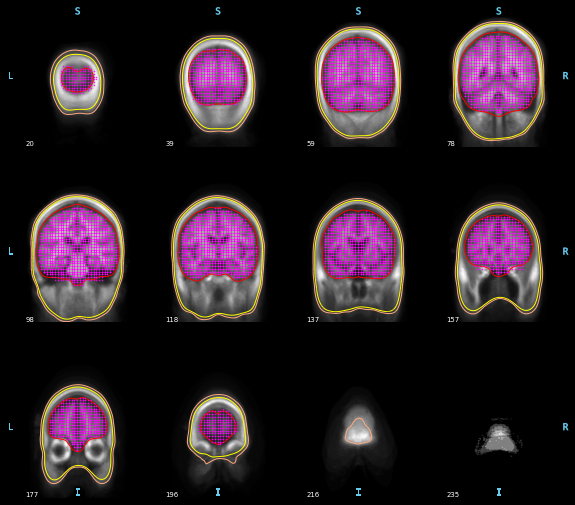

In [6]:
mne.viz.plot_bem(src=src, subject=subject);

In [19]:
# try to do exaclty the same thing  with what is stored in neurolib folder

In [8]:
fig = mne.viz.create_3d_figure(size=(600, 400))

# Plot the cortex
mne.viz.plot_alignment(
    subject=subject, subjects_dir=subject_dir, trans=trans,
    surfaces='white', coord_frame='head', fig=fig)

# Show the three dipoles defined at each location in the source space
mne.viz.plot_alignment(
    subject=subject, subjects_dir=subject_dir, trans=trans, fwd=forward_solution,
    surfaces='white', coord_frame='head', fig=fig)

mne.viz.set_3d_view(figure=fig, azimuth=180, distance=0.25)

In [26]:
hem = forward_solution['src'][0]  # Visualize the left hemisphere
verts = hem['rr']  # The vertices of the source space
tris = hem['tris']  # Groups of three vertices that form triangles
dip_pos = hem['rr'][hem['vertno']]  # The position of the dipoles
dip_ori = hem['nn'][hem['vertno']]
dip_len = len(dip_pos)
dip_times = [0]
white = (1.0, 1.0, 1.0)  # RGB values for a white color

actual_amp = np.ones(dip_len)  # misc amp to create Dipole instance
actual_gof = np.ones(dip_len)  # misc GOF to create Dipole instance
dipoles = mne.Dipole(dip_times, dip_pos, actual_amp, dip_ori, actual_gof)

In [27]:
fig = mne.viz.create_3d_figure(size=(600, 400), bgcolor=white)
coord_frame = 'mri'

# Plot the cortex
mne.viz.plot_alignment(
    subject=subject, subjects_dir=subject_dir, trans=trans, surfaces='white',
    coord_frame=coord_frame, fig=fig)

# Mark the position of the dipoles with small red dots
mne.viz.plot_dipole_locations(
    dipoles=dipoles, trans=trans, mode='sphere', subject=subject,
    subjects_dir=subject_dir, coord_frame=coord_frame, scale=7e-4, fig=fig)

mne.viz.set_3d_view(figure=fig, azimuth=180, distance=0.25)

In [28]:
mne.convert_forward_solution(forward_solution, surf_ori=True, copy=False)

    No patch info available. The standard source space normals will be employed in the rotation to the local surface coordinates....
    Converting to surface-based source orientations...
    [done]


Good channels,94 EEG
Bad channels,None
Source space,Volume with 14629 grid points
Source orientation,Free


In [29]:
fig = mne.viz.create_3d_figure(size=(600, 400), bgcolor=white)
coord_frame = 'mri'

# Plot the cortex
mne.viz.plot_alignment(
    subject=subject, subjects_dir=subject_dir, trans=trans, surfaces='white',
    coord_frame=coord_frame, fig=fig)

# Mark the position of the dipoles with small red dots
mne.viz.plot_dipole_locations(
    dipoles=dipoles, trans=trans, mode='sphere', subject=subject,
    subjects_dir=subject_dir, coord_frame=coord_frame, scale=7e-4, fig=fig)

mne.viz.set_3d_view(figure=fig, azimuth=180, distance=0.25)

In [31]:
fig = mne.viz.create_3d_figure(size=(600, 400))

# Plot the cortex
mne.viz.plot_alignment(
    subject=subject, subjects_dir=subject_dir, trans=trans,
    surfaces='white', coord_frame='head', fig=fig)

# Show the dipoles as arrows pointing along the surface normal
mne.viz.plot_dipole_locations(
    dipoles=dipoles, trans=trans, mode='arrow', subject=subject,
    subjects_dir=subject_dir, coord_frame='head', scale=7e-4, fig=fig)

mne.viz.set_3d_view(figure=fig, azimuth=180, distance=0.25)